In [80]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve


In [81]:
df=pd.read_csv("tested.csv")

In [82]:
df.shape

(418, 12)

In [83]:
df.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
df.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [86]:
df.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [87]:
df.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [89]:
df.shape

(418, 12)

In [90]:
df=df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [91]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [92]:
def age_approx(cols):
    Age = cols [0]
    Pclass = cols [1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        
    


In [93]:
df.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.467290,40.918367,0.476636,0.383178,94.280297
2,0.322581,28.777500,0.376344,0.344086,22.202104
3,0.330275,24.027945,0.463303,0.417431,12.459678


In [94]:
df["Age"] = df[["Age","Pclass"]].apply(age_approx, axis=1)

In [95]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [96]:
df.dropna(inplace=True)

In [97]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [98]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [99]:
df_dummied=pd.get_dummies(df,columns=["Sex"])

In [100]:
df_dummied=pd.get_dummies(df_dummied,columns=["Embarked"])

In [101]:
df_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1


<AxesSubplot:>

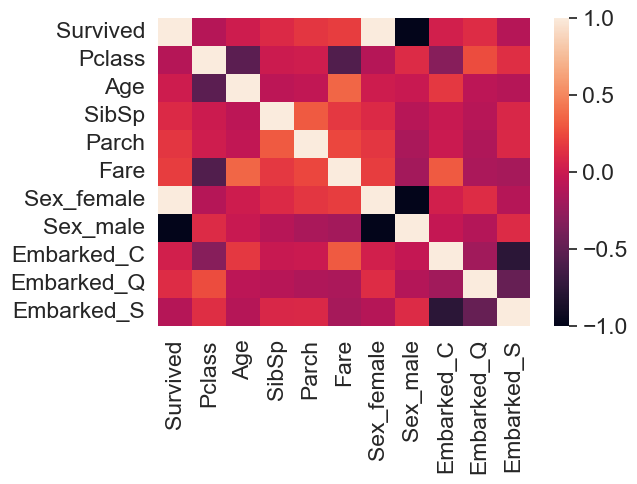

In [102]:
plt.figure(figsize=(6,4))
import seaborn as sns
sns.heatmap(df_dummied.corr())

In [103]:
used_features= ["Pclass","Age","SibSp","Parch","Fare","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

In [104]:
X=df_dummied[used_features].values

In [105]:
y=df_dummied["Survived"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(291, 10)
(126, 10)
(291,)
(126,)


In [108]:
LR=LogisticRegression()

In [109]:
LR.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
y_pred = LR.predict(X_test)

In [111]:
metrics.confusion_matrix(y_test,y_pred)

array([[79,  0],
       [ 0, 47]], dtype=int64)

In [112]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        47

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [115]:
LR.coef_

array([[-1.25237504e-01, -3.82852711e-03,  6.11575273e-02,
         7.57332777e-02,  1.46314853e-03,  3.61038489e+00,
        -3.58871601e+00, -9.01460630e-02,  2.35323372e-01,
        -1.23508424e-01]])

In [116]:
LR.intercept_

array([0.03482725])

In [118]:
df_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [119]:
LR.predict_proba(X_test)

array([[0.04002293, 0.95997707],
       [0.98410865, 0.01589135],
       [0.0452102 , 0.9547898 ],
       [0.97868802, 0.02131198],
       [0.03154528, 0.96845472],
       [0.98422171, 0.01577829],
       [0.97781793, 0.02218207],
       [0.98404235, 0.01595765],
       [0.9830823 , 0.0169177 ],
       [0.96674037, 0.03325963],
       [0.03149329, 0.96850671],
       [0.98309085, 0.01690915],
       [0.97809315, 0.02190685],
       [0.98236538, 0.01763462],
       [0.978797  , 0.021203  ],
       [0.9837144 , 0.0162856 ],
       [0.9825269 , 0.0174731 ],
       [0.03671818, 0.96328182],
       [0.02775014, 0.97224986],
       [0.04536625, 0.95463375],
       [0.97502042, 0.02497958],
       [0.98434365, 0.01565635],
       [0.98112468, 0.01887532],
       [0.97874134, 0.02125866],
       [0.03310176, 0.96689824],
       [0.04135772, 0.95864228],
       [0.98158239, 0.01841761],
       [0.03670491, 0.96329509],
       [0.98359138, 0.01640862],
       [0.98422171, 0.01577829],
       [0.